**Proyek Akhir Uas** <br>
****
**Nama : M DIAN FAUZI** <br>
**NIM : 23.11.5604** <br>
**Kelas : 23IF04** <br>
**Mata Kuliah : BIG DATA & DATA MINING** <br>

# **Analisis Prediksi Churn Pelanggan Telekomunikasi Menggunakan Algoritma Random Forest dan XGBoost Berbasis Data Mining**

In [8]:
!pip install xgboost imbalanced-learn

In [15]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset (Pastikan path sesuai dengan Google Drive kamu)
df = pd.read_csv('/content/drive/MyDrive/DataMinning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [16]:
print("=== PROFILE DATASET ===")
print("5 Data Teratas:")
display(df.head())

print("\nInfo Dataset:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe())

=== PROFILE DATASET ===
5 Data Teratas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
print("=== DATA CLEANING ===")

# 1. Membuang kolom ID (tidak butuh untuk EDA maupun modeling)
df = df.drop(['customerID'], axis=1)

# 2. Handling Error pada TotalCharges (Object -> Float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Mengisi Missing Values (jika ada yang jadi NaN setelah convert)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

print("Data Cleaning Selesai. Cek Missing Values:")
print(df.isnull().sum().sum())

=== DATA CLEANING ===
Data Cleaning Selesai. Cek Missing Values:
0


=== EXPLORATORY DATA ANALYSIS (EDA) ===


/tmp/ipython-input-2028476750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


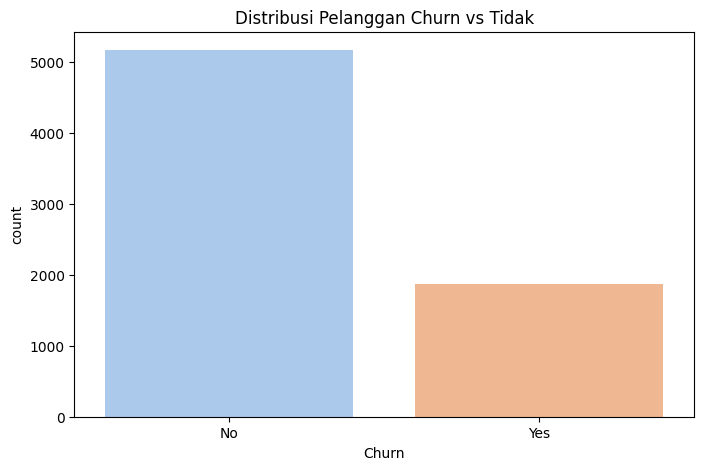

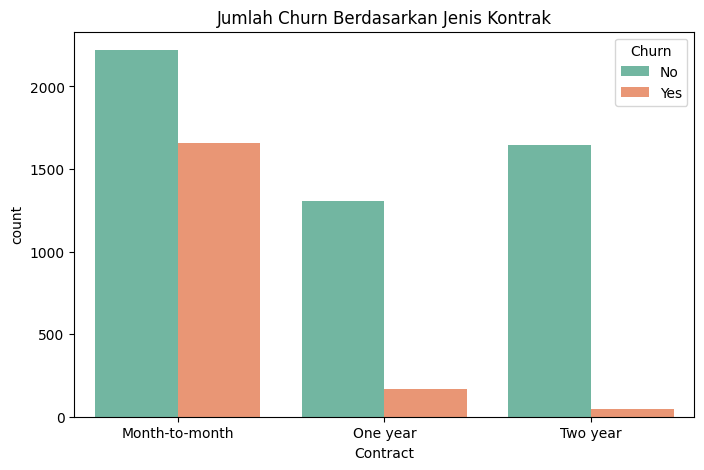

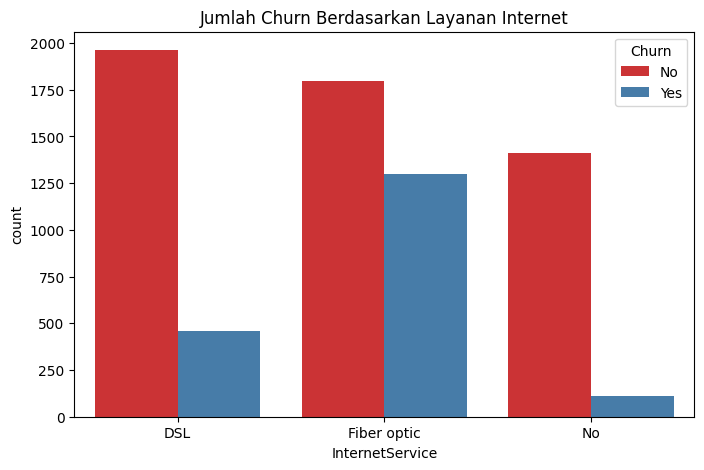

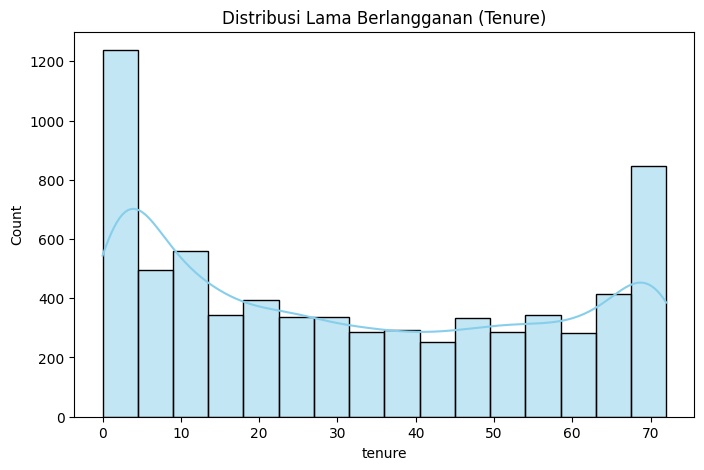

In [19]:
print("=== EXPLORATORY DATA ANALYSIS (EDA) ===")

# Gambar 1: Distribusi Target Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribusi Pelanggan Churn vs Tidak')
plt.show()

# Gambar 2: Hubungan Kontrak dengan Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Jumlah Churn Berdasarkan Jenis Kontrak')
plt.show()

# Gambar 3: Hubungan Layanan Internet dengan Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set1')
plt.title('Jumlah Churn Berdasarkan Layanan Internet')
plt.show()

# Gambar 4: Distribusi Lama Berlangganan (Tenure)
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Distribusi Lama Berlangganan (Tenure)')
plt.show()

In [20]:
print("=== PREPROCESSING LANJUTAN ===")

# 1. Encoding (Mengubah Teks jadi Angka)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn']) # Yes=1, No=0

# One-Hot Encoding untuk fitur kategori lainnya
df = pd.get_dummies(df, drop_first=True)

# 2. Split Data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling (Standarisasi)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. SMOTE (Handling Imbalanced Data)
# Penting: SMOTE hanya dilakukan pada Data Training!
print(f"Jumlah Churn sebelum SMOTE: {sum(y_train==1)}")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Jumlah Churn SETELAH SMOTE: {sum(y_train_resampled==1)}")

=== PREPROCESSING LANJUTAN ===
Jumlah Churn sebelum SMOTE: 1496
Jumlah Churn SETELAH SMOTE: 4138


In [26]:
print("=== MODELING ===")

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)
print("Model Random Forest Selesai Dilatih.")

# Model 2: XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)
print("Model XGBoost Selesai Dilatih.")

=== MODELING ===
Model Random Forest Selesai Dilatih.
Model XGBoost Selesai Dilatih.


=== SELEKSI FITUR ===


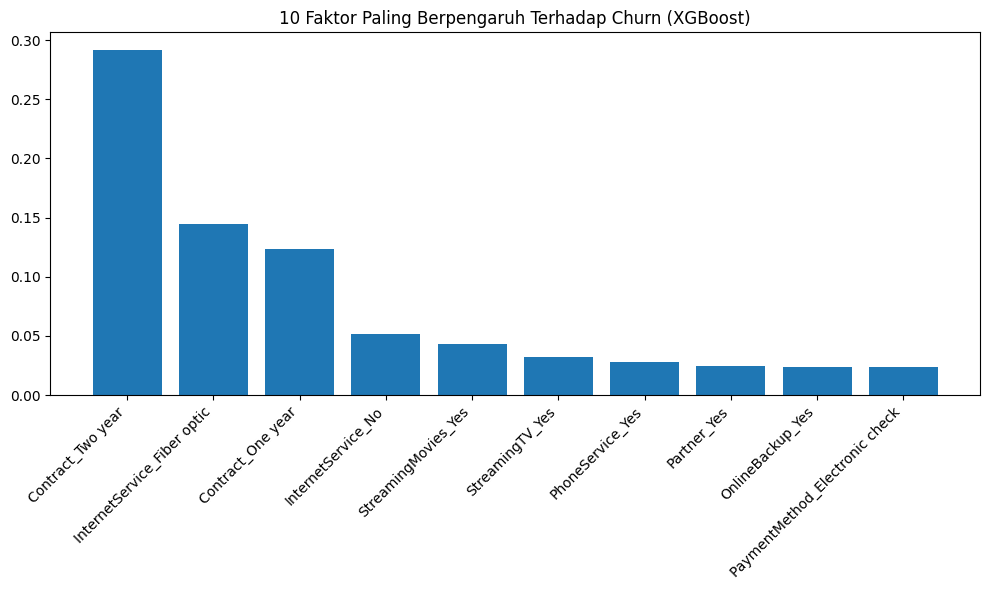

In [27]:
print("=== SELEKSI FITUR ===")

# Mengambil nama fitur setelah one-hot encoding
feature_names = df.drop('Churn', axis=1).columns

# Mengambil importance dari XGBoost
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualisasi Top 10 Fitur
plt.figure(figsize=(10, 6))
plt.title("10 Faktor Paling Berpengaruh Terhadap Churn (XGBoost)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

=== EVALUASI MODEL ===

--- Evaluasi Random Forest ---
Akurasi: 0.7878

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.60      0.60      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



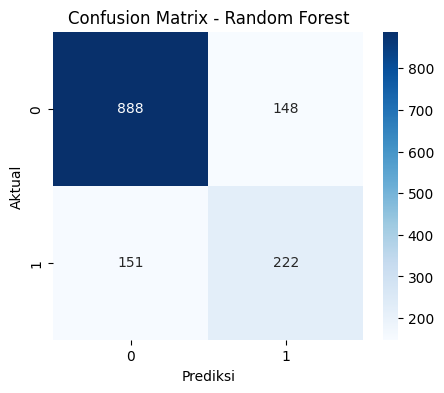


--- Evaluasi XGBoost ---
Akurasi: 0.7977

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.62      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



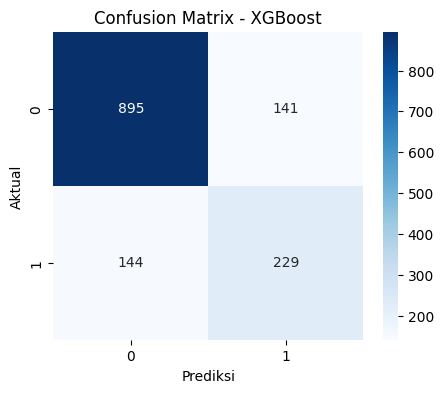

In [28]:
print("=== EVALUASI MODEL ===")

def evaluasi_model(nama_model, y_test, y_pred):
    print(f"\n--- Evaluasi {nama_model} ---")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {nama_model}')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show()

# Evaluasi Random Forest
evaluasi_model("Random Forest", y_test, y_pred_rf)

# Evaluasi XGBoost
evaluasi_model("XGBoost", y_test, y_pred_xgb)

In [29]:
print("=== MENYIMPAN MODEL ===")
import joblib

# 1. Random Forest (Wajib .pkl karena Scikit-Learn)
joblib.dump(rf_model, 'random_forest_model.pkl')

# 2. XGBoost (Menggunakan format JSON bawaan XGBoost)
xgb_model.save_model('xgboost_model.json')

print("Model Random Forest disimpan sebagai .pkl")
print("Model XGBoost disimpan sebagai .json")

=== MENYIMPAN MODEL ===
Model Random Forest disimpan sebagai .pkl
Model XGBoost disimpan sebagai .json
